In [19]:
#1a

![Alt text](1a.jpg)

In [23]:
#1b
import numpy as np

def simulate_markov_chain(transition_matrix, initial_state, num_steps):
    current_state = initial_state
    states_result = [current_state]

    for _ in range(num_steps - 1):
        current_state = np.random.choice(range(1,4), p=transition_matrix[current_state-1])
        states_result.append(current_state)

    return states_result

# define transition matrix
transition_matrix = np.array([[0.2, 0.7, 0.1],
                              [0.2, 0.5, 0.3],
                              [0.2, 0.4, 0.4]])

# set initial state and the number of steps
initial_state = 1  # initial state is 1
num_steps = 20  # the number of steps from simulation

# simulation
result = simulate_markov_chain(transition_matrix, initial_state, num_steps)

# print the result
print(f"Results of a {num_steps}-step Markov Chain Simulation:{result}")

Results of a 20-step Markov Chain Simulation:[1, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 1, 2, 2, 3, 3, 3, 2]


In [20]:
#2a

![Alt text](2a.jpg)

In [44]:
#2b
import numpy as np
def compute_pi_i_transpose(transition_matrix, pi_0_transpose, i):
    pi_i_transpose=pi_0_transpose
    for j in range(i):
        pi_i_transpose=pi_i_transpose@transition_matrix
    return pi_i_transpose


#initialize transition matrix and initial probability distribution
transition_matrix = np.array([[0.2, 0.7, 0.1],
                              [0.2, 0.5, 0.3],
                              [0.2, 0.4, 0.4]])

pi_0=np.array([[1/3],[1/3],[1/3]])
pi_0_transpose=np.transpose(pi_0)

#set steps of markov chain
i=1000

result=compute_pi_i_transpose(transition_matrix, pi_0_transpose, i)
#print the result
print(f"pi_{i}_transpose is: {result}")

#when the first element of pi_100000_transpose is 0.2, "a" in pi_infinity equals to 13/45
pi_infinity_transpose=np.array([[9/13*(13/45),23/13*(13/45),13/45]])
print("pi_infinity_transpose is:",pi_infinity_transpose)

pi_10_transpose is: [[0.2        0.51111111 0.28888889]]
pi_infinity_transpose is: [[0.2        0.51111111 0.28888889]]


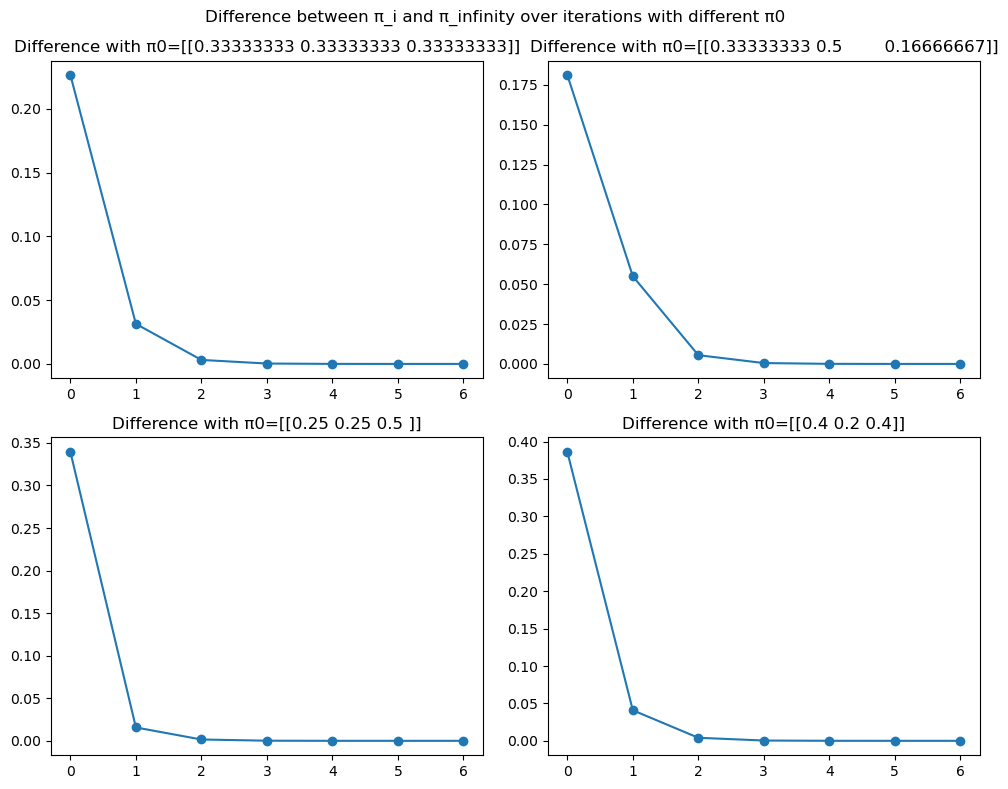

In [24]:
#compare with pi_infinity
import matplotlib.pyplot as plt

##define Euclidean norm between two vectors
def Euclidean_norm(vector1,vector2):
    difference = vector1 - vector2
    norm_value = np.linalg.norm(difference)
    return norm_value

##define difference between every pi_i and pi_infinity
def difference(transition_matrix, pi_0_transpose, pi_infinity_transpose, i):
    diff=[]
    pi_i_transpose=pi_0_transpose
    diff.append(Euclidean_norm(pi_i_transpose,pi_infinity_transpose))
    for j in range(i):
        pi_i_transpose=pi_i_transpose@transition_matrix
        diff.append(Euclidean_norm(pi_i_transpose,pi_infinity_transpose))
    return diff

##set the value
i=6
transition_matrix = np.array([[0.2, 0.7, 0.1],
                              [0.2, 0.5, 0.3],
                              [0.2, 0.4, 0.4]])
pi_infinity_transpose=np.array([[9/13*(13/45),23/13*(13/45),13/45]])

pi_01=np.array([[1/3],[1/3],[1/3]]) #first initial probability distribution
pi_01_transpose=np.transpose(pi_01)

pi_02=np.array([[1/3],[1/2],[1/6]]) #second initial probability distribution
pi_02_transpose=np.transpose(pi_02)

pi_03=np.array([[1/4],[1/4],[1/2]]) #third initial probability distribution
pi_03_transpose=np.transpose(pi_03)

pi_04=np.array([[2/5],[1/5],[2/5]]) #fourth initial probability distribution
pi_04_transpose=np.transpose(pi_04)

##result
diff_values1=difference(transition_matrix, pi_01_transpose, pi_infinity_transpose, i)
diff_values2=difference(transition_matrix, pi_02_transpose, pi_infinity_transpose, i)
diff_values3=difference(transition_matrix, pi_03_transpose, pi_infinity_transpose, i)
diff_values4=difference(transition_matrix, pi_04_transpose, pi_infinity_transpose, i)
##plot the difference
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(range(i + 1), diff_values1, marker='o')
axs[0, 0].set_title(f'Difference with π0={pi_01_transpose}')

axs[0, 1].plot(range(i + 1), diff_values2, marker='o')
axs[0, 1].set_title(f'Difference with π0={pi_02_transpose}')

axs[1, 0].plot(range(i + 1), diff_values3, marker='o')
axs[1, 0].set_title(f'Difference with π0={pi_03_transpose}')

axs[1, 1].plot(range(i + 1), diff_values4, marker='o')
axs[1, 1].set_title(f'Difference with π0={pi_04_transpose}')

plt.suptitle('Difference between π_i and π_infinity over iterations with different π0')
plt.tight_layout()
plt.show()
    

In [10]:
#3a
import time
import numpy as np

def wait_time(transition_matrix, initial_state):
    waiting_time = []
    for i in range(50000):
        current_state = initial_state
        states_result = [current_state]
        while current_state !=3:
            current_state = np.random.choice(range(1,4), p=transition_matrix[(current_state-1),:])
            states_result.append(current_state)
            
        waiting_time.append(len(states_result)-1)
    return waiting_time

#set transition_matrix
transition_matrix = np.array([[0.2, 0.7, 0.1],
                              [0.2, 0.5, 0.3],
                              [0.2, 0.4, 0.4]])

#when initial state is 1
initial_state1 =1
waiting_time1=wait_time(transition_matrix, initial_state1)

#when initial state is 2
initial_state2 =2
waiting_time2=wait_time(transition_matrix, initial_state2)


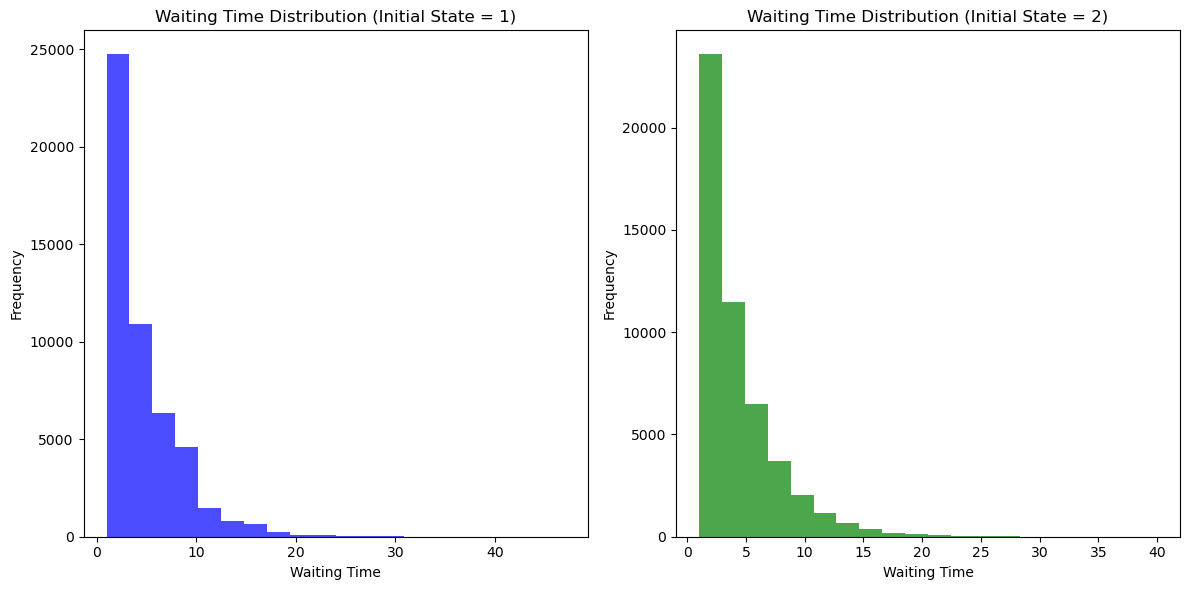

In [11]:
#plot the result
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# subplot of initial state is 1
plt.subplot(1, 2, 1)
plt.hist(waiting_time1, bins=20, color='blue', alpha=0.7)
plt.title('Waiting Time Distribution (Initial State = 1)')
plt.xlabel('Waiting Time')
plt.ylabel('Frequency')

# subplot of initial state is 2
plt.subplot(1, 2, 2)
plt.hist(waiting_time2, bins=20, color='green', alpha=0.7)
plt.title('Waiting Time Distribution (Initial State = 2)')
plt.xlabel('Waiting Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [9]:
#mean of arrival time
##initial state is 1
mean_arrival_time1=np.mean(waiting_time1)
print("Mean of the arrival time with X0=1 is:",mean_arrival_time1)
##initial state is 2
mean_arrival_time2=np.mean(waiting_time2)
print("Mean of the arrival time with X0=2 is:",mean_arrival_time2)



Mean of the arrival time with X0=1 is: 4.59907
Mean of the arrival time with X0=2 is: 3.84398


In [ ]:
#3(b)

![Alt text](3b.jpg)